# Human-Zombie Dataset

This dataset simulates human and zombie characteristics based on various lifestyle and physical traits. The dataset contains 1,000 entries, each with features that correlate with a continuous "Human-Zombie Score" ranging from 0 (complete human) to 100 (complete zombie).

This generation of human race has smart-chips embedded in their bloodstream that can keep track of and record all these features.

## Features

- **Height (cm):** The height of the individual measured in centimeters, it decreases with zombie score because zombies are known to shrink in height.

- **Weight (kg):** The weight of the individual measured in kilograms. Zombies tend to have a lower weight because of loss of muscle mass, tissue, organs (and soul??).

- **Screen Time (hrs):** The average number of hours spent in front of screens daily. This feature increases with the human-zombie score, reflecting a more sedentary lifestyle.

- **Junk Food (days/week):** The average number of days per week the individual consumes junk food. This feature also increases with the human-zombie score, indicating poorer dietary habits.

- **Physical Activity (hrs/week):** The total hours spent on physical activities per week. This feature decreases as the human-zombie score increases, suggesting a decline in physical activity.

- **Task Completion (scale):** Scale from 0 to 10 representing how often tasks are completed on time (0 = always on time, 10 = never on time). This score decreases with a higher human-zombie score, indicating declining productivity.

- **Human-Zombie Score:** A continuous score from 0 to 100 representing the degree of "zombie-ness" of the individual, where 0 is fully human and 100 is completely zombie-like.

## Usage

This dataset can be used for various analyses, including regression modeling to predict the human-zombie score based on lifestyle and physical traits.


## Multivariate Linear Regression



### Part A: Implementation from Scratch 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('data/human_zombie_dataset_v5.csv')

missing_info = data.isnull().sum()
print("Missing values per column:\n", missing_info)

threshold = 0.5 * data.shape[0] 

for column in data.columns:
    if missing_info[column] > 0:
        if missing_info[column] > threshold:
            data = data.drop(columns=[column])
        else:
            data[column].fillna(data[column].mean(), inplace=True)

print("Dataset after handling missing values:\n", data.head())

Missing values per column:
 Height (cm)                     0
Weight (kg)                     0
Screen Time (hrs)               0
Junk Food (days/week)           0
Physical Activity (hrs/week)    0
Task Completion (scale)         0
Human-Zombie Score              0
dtype: int64
Dataset after handling missing values:
    Height (cm)  Weight (kg)  Screen Time (hrs)  Junk Food (days/week)  \
0          157           41           8.455099               5.622736   
1          151           40           8.581430               5.922744   
2          166           45           5.018847               5.746557   
3          160           75           6.417010               4.634547   
4          153           74           4.417465               4.740153   

   Physical Activity (hrs/week)  Task Completion (scale)  Human-Zombie Score  
0                      4.474819                 6.166119           54.881350  
1                      3.749707                 1.084877           71.518937  
2    

In [3]:

X = data.drop(columns=['Human-Zombie Score'])  
y = data['Human-Zombie Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)


Training set shape (X_train): (800, 6)
Training set shape (y_train): (800,)
Testing set shape (X_test): (200, 6)
Testing set shape (y_test): (200,)


#### Normalizing Data  

In [4]:
# CURRENTLY NORMALISING HERE BUT CHECK FI WE NEEDE TO DO IT L8R
class StandardScaler:
    def __init__(self):
        self.means = None
        self.stds = None
    
    def fit(self, X):
        self.means = X.mean(axis=0)
        self.stds = X.std(axis=0)
    
    def transform(self, X):
        if self.means is None or self.stds is None:
            raise ValueError("The scaler has not been fitted yet")
        return (X - self.means) / self.stds

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)


Scaled training set shape: (800, 6)
Scaled test set shape: (200, 6)


#### Gradient Descent



In [13]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        cost_history = []

        for i in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # COST AKA MSE
            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)
            cost_history.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if i % 100 == 0:
                print(f"Iteration {i}: Cost {cost}")

        return cost_history

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        y_predicted = self.predict(X)
        mse = np.mean((y_predicted - y) ** 2)/2
        return mse


Iteration 0: Cost 1656.516687769342
Iteration 100: Cost 182.02426480037278
Iteration 200: Cost 37.30457801806786
Iteration 300: Cost 17.264931325757782
Iteration 400: Cost 14.248920063392916
Iteration 500: Cost 13.670297980315603
Iteration 600: Cost 13.497436032375724
Iteration 700: Cost 13.420794959961823
Iteration 800: Cost 13.379827255926408
Iteration 900: Cost 13.356303583108609


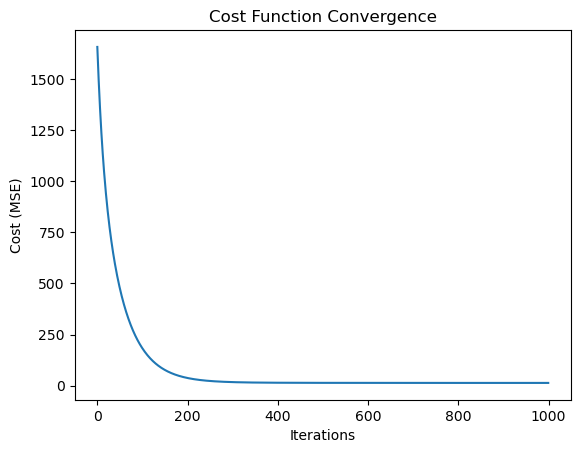

Mean Squared Error on Training set: 13.342280463677103
Mean Squared Error on Test set: 12.080588302763543


In [15]:
model = LinearRegression(learning_rate=0.01, n_iterations=1000)

cost_history = model.fit(X_train_scaled, y_train)

import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()

train_mse = model.score(X_train_scaled, y_train)
test_mse = model.score(X_test_scaled, y_test)

print("Mean Squared Error on Training set:", train_mse)
print("Mean Squared Error on Test set:", test_mse)
# print("Mean Squared Error on Training set:", train_mse)
# print("Mean Squared Error on Test set:", test_mse)


### Part B: Regularized Linear Regression Using Scikit-learn (


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


#### Linear Regression (using `sklearn`)



In [8]:
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled, y_train)

y_prediction_train = lin_reg.predict(X_train_scaled)
y_prediction_test = lin_reg.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_prediction_train)/2
mse_test = mean_squared_error(y_test, y_prediction_test)/2

print(f"Linear Regression MSE on Scaled Training Set: {mse_train}")
print(f"Linear Regression MSE on Scaled Test Set: {mse_test}")


Linear Regression MSE on Scaled Training Set: 13.313961964880345
Linear Regression MSE on Scaled Test Set: 12.072050097507992


#### Ridge



Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0005 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0006 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0008 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0009 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0011 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0014 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0016 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0020 | Train MSE/2: 13.3140 | Test MSE/2: 12.07

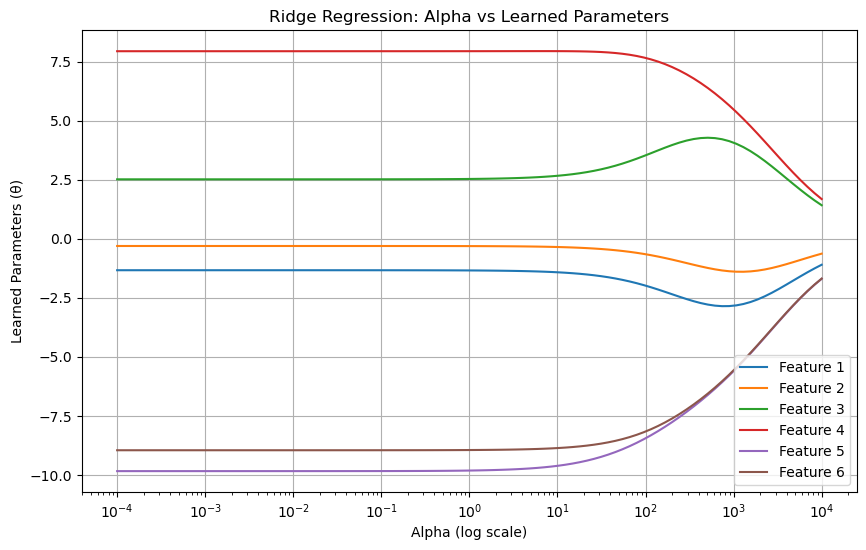

In [9]:
alphas = np.logspace(-4, 4, 100)
coefs = []
mse_train = []
mse_test = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    coefs.append(ridge.coef_)
    
    y_train_prediction = ridge.predict(X_train_scaled)
    y_test_pred = ridge.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_prediction) / 2
    test_mse = mean_squared_error(y_test, y_test_pred) / 2
    
    mse_train.append(train_mse)
    mse_test.append(test_mse)
    
    print(f"Alpha: {alpha:.4f} | Train MSE/2: {train_mse:.4f} | Test MSE/2: {test_mse:.4f}")

plt.figure(figsize=(10, 6))
for i in range(X_train_scaled.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Learned Parameters (θ)')
plt.title('Ridge Regression: Alpha vs Learned Parameters')
plt.legend()
plt.grid(True)
plt.show()


#### Lasso



Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0005 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0006 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0008 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0009 | Train MSE/2: 13.3140 | Test MSE/2: 12.0720
Alpha: 0.0011 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0014 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0016 | Train MSE/2: 13.3140 | Test MSE/2: 12.0721
Alpha: 0.0020 | Train MSE/2: 13.3140 | Test MSE/2: 12.07

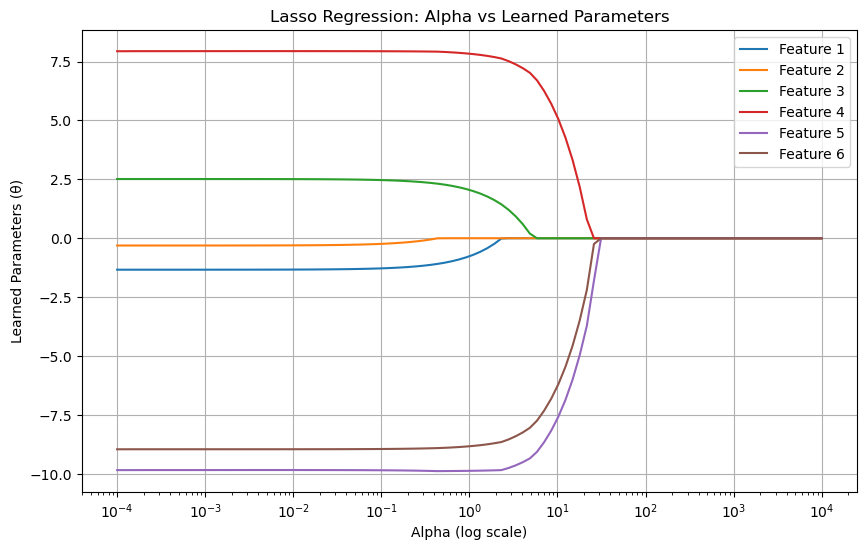

In [10]:
alphas = np.logspace(-4, 4, 100)

coefs = []

mse_train = []
mse_test = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    coefs.append(lasso.coef_)
    
    y_train_prediction = lasso.predict(X_train_scaled)
    y_test_pred = lasso.predict(X_test_scaled)
    
    train_mse = mean_squared_error(y_train, y_train_prediction) / 2
    test_mse = mean_squared_error(y_test, y_test_pred) / 2
    
    mse_train.append(train_mse)
    mse_test.append(test_mse)
    
    print(f"Alpha: {alpha:.4f} | Train MSE/2: {train_mse:.4f} | Test MSE/2: {test_mse:.4f}")

plt.figure(figsize=(10, 6))
for i in range(X_train_scaled.shape[1]):
    plt.plot(alphas, [coef[i] for coef in coefs], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Learned Parameters (θ)')
plt.title('Lasso Regression: Alpha vs Learned Parameters')
plt.legend()
plt.grid(True)
plt.show()


#### Elastic Net


In [11]:
alphas = np.logspace(-4, 4, 100)
l1_ratio = 0.5  

mse_train = []
mse_test = []

for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    elastic_net.fit(X_train_scaled, y_train)
    
    y_train_prediction = elastic_net.predict(X_train_scaled)
    y_test_pred = elastic_net.predict(X_test_scaled)
    
    train_mse = np.mean((y_train_prediction - y_train) ** 2) / 2
    test_mse = np.mean((y_test_pred - y_test) ** 2) / 2
    
    mse_train.append(train_mse)
    mse_test.append(test_mse)
    
    print(f"Alpha: {alpha:.4f} | Train MSE/2: {train_mse:.4f} | Test MSE/2: {test_mse:.4f}")


Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0719
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0719
Alpha: 0.0001 | Train MSE/2: 13.3140 | Test MSE/2: 12.0719
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0718
Alpha: 0.0002 | Train MSE/2: 13.3140 | Test MSE/2: 12.0718
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0717
Alpha: 0.0003 | Train MSE/2: 13.3140 | Test MSE/2: 12.0716
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0715
Alpha: 0.0004 | Train MSE/2: 13.3140 | Test MSE/2: 12.0714
Alpha: 0.0005 | Train MSE/2: 13.3140 | Test MSE/2: 12.0712
Alpha: 0.0006 | Train MSE/2: 13.3140 | Test MSE/2: 12.0711
Alpha: 0.0008 | Train MSE/2: 13.3140 | Test MSE/2: 12.0709
Alpha: 0.0009 | Train MSE/2: 13.3140 | Test MSE/2: 12.0707
Alpha: 0.0011 | Train MSE/2: 13.3140 | Test MSE/2: 12.0704
Alpha: 0.0014 | Train MSE/2: 13.3140 | Test MSE/2: 12.0702
Alpha: 0.0016 | Train MSE/2: 13.3140 | Test MSE/2: 12.0698
Alpha: 0.0020 | Train MSE/2: 13.3141 | Test MSE/2: 12.06